In [22]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gs
import seaborn as sns
from sklearn import linear_model, datasets
import plotly.offline as pyoff
import plotly.graph_objs as go
from chart_studio import plotly
from sklearn.metrics import mean_squared_error, r2_score
import plotly.io as pio

In [23]:
df = pd.read_csv('C:\\Users\\sonal\\OneDrive\\Desktop\\Education\\06 Spring 2022\\Comp Sci\\Homework\\Telco-Customer-Churn.csv')

In [24]:
df.sort_values(['Churn'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4334,3969-GYXEL,Female,0,No,No,11,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,76.40,838.7,No
4333,5325-UWTWJ,Male,0,Yes,No,31,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),90.55,2929.75,No
4332,4194-FJARJ,Female,0,Yes,Yes,54,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),60.00,3273.95,No
4331,5743-KHMNA,Male,0,No,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.55,1898.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,3512-IZIKN,Female,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),65.30,4759.75,Yes
1161,5868-CZJDR,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,31.35,31.35,Yes
1159,4086-YQSNZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.40,224.05,Yes
1163,0135-NMXAP,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.75,1052.4,Yes


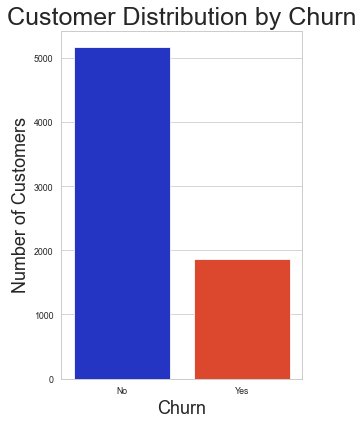

In [25]:
fig = plt.figure(figsize = (12,6))
plt.subplot(132)
churn = sns.countplot(x = df['Churn'], palette = ['#091FDE', '#F93411'])
churn.set_title('Customer Distribution by Churn', fontsize = 25, fontweight = 'normal')
churn.set_xlabel('Churn', fontweight = 'normal', fontsize = 18)
churn.set_ylabel('Number of Customers', fontweight = 'normal', fontsize = 18)
plt.tight_layout()
plt.show()

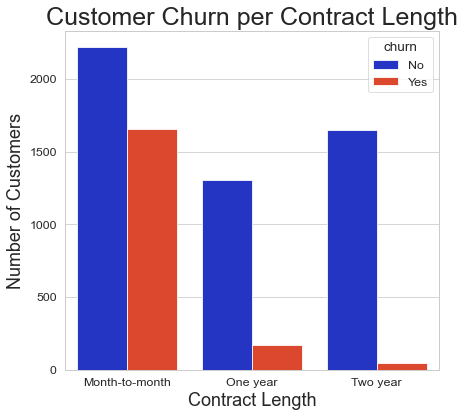

In [26]:
# Make all column names lowercase
df.columns = map(str.lower, df.columns)
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('C:\\Users\\sonal\\OneDrive\\Desktop\\Education\\06 Spring 2022\\Comp Sci\\Homework\\Adjusted-Telco-Customer-Churn.csv')
# Creating the graph
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 1.4)
fig = plt.figure(figsize = (18,6))
plt.subplot(132)
contract = sns.countplot(data = df, x = 'contract', hue = 'churn', palette = ['#091FDE','#F93411'])
contract.set_title('Customer Churn per Contract Length', fontsize = 25, fontweight = 'normal')
contract.set_xlabel('Contract Length', fontweight = 'normal', fontsize = 18)
contract.set_ylabel('Number of Customers', fontweight = 'normal', fontsize = 18)
plt.tight_layout()
plt.show()

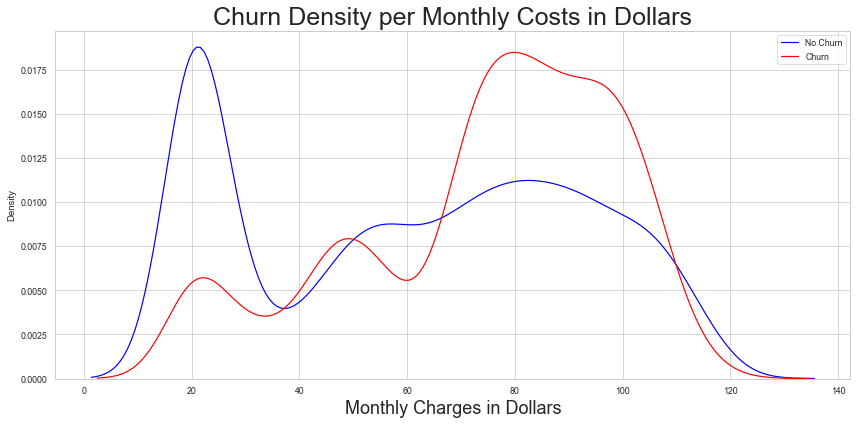

In [27]:
# Make all column names lowercase
df.columns = map(str.lower, df.columns)
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('C:\\Users\\sonal\\OneDrive\\Desktop\\Education\\06 Spring 2022\\Comp Sci\\Homework\\Adjusted-Telco-Customer-Churn.csv')
# Creating the graph
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 1)
plt.figure(figsize = (12,6))
plt.title(f'Churn Density per Monthly Costs in Dollars', fontsize = 25, fontweight = 'normal')
monthlyCost = sns.kdeplot(df[df.churn =='No']['monthlycharges'].dropna(), color = 'blue')
monthlyCost1 = sns.kdeplot(df[df.churn =='Yes']['monthlycharges'].dropna(), color = 'red')
plt.legend(labels = ['No Churn', 'Churn'])
plt.xlabel('Monthly Charges in Dollars', fontsize = 18, fontweight = 'normal')
plt.tight_layout()
plt.show()

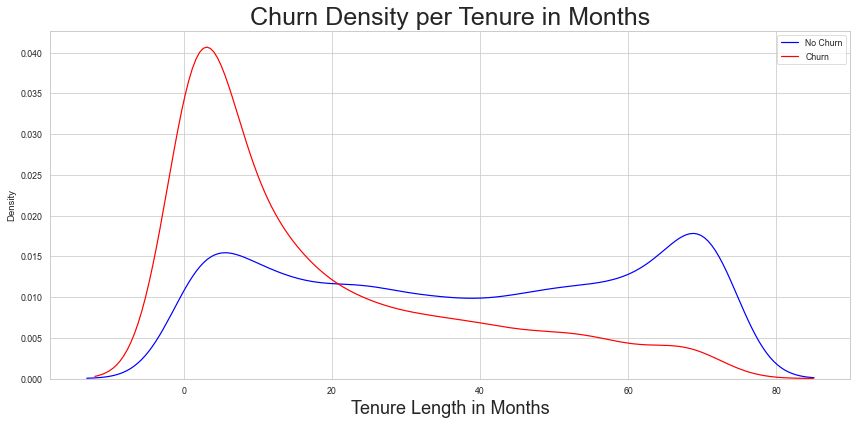

In [28]:
# Make all column names lowercase
df.columns = map(str.lower, df.columns)
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('C:\\Users\\sonal\\OneDrive\\Desktop\\Education\\06 Spring 2022\\Comp Sci\\Homework\\Adjusted-Telco-Customer-Churn.csv')
# Creating the graph
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 1)
plt.figure(figsize = (12,6))
plt.title(f'Churn Density per Tenure in Months', fontsize = 25, fontweight = 'normal')
tenure = sns.kdeplot(df[df.churn =='No']['tenure'].dropna(), color = 'blue')
tenure1 = sns.kdeplot(df[df.churn =='Yes']['tenure'].dropna(), color = 'red')
plt.legend(labels = ['No Churn', 'Churn'])
plt.xlabel('Tenure Length in Months', fontsize = 18, fontweight = 'normal')
plt.tight_layout()
plt.show()

In [42]:
# Change strings of 'No' and 'Yes' to binary values.
df.loc[df.churn=='No','Churn'] = 0 
df.loc[df.churn=='Yes','Churn'] = 1
# Begins creation of graph
df_plot = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Scatter(x=df_plot['tenure'], y=df_plot['Churn'], mode='markers', name='Low', marker= dict(size= 7, line= dict(width=1), color = 'red',opacity= 0.8))]
plot_layout = go.Layout(yaxis= {'title': "Churn Likelihood"}, xaxis= {'title': "Tenure in Months"}, title='Churn Likelihood per Tenure in Months', plot_bgcolor= "rgb(243,243,243)", paper_bgcolor  = "rgb(243,243,243)")
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()
pio.write_html(fig, file='figure.html',auto_open=True)

In [ ]:
# Code for model training
def show_single_variable_linear_regression(X, y):
    # Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)
    # Use only one feature
    X_small = X.array.reshape(-1,1)
    # Split the data into training/testing sets
    X_train = X_small[:-TEST_SIZE]
    X_test = X_small[-TEST_SIZE:]
    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    # Plot outputs
    plt.scatter(X_test[:100], y_test[:100], color="black")
    plt.plot(X_test[:100], y_pred[:100], color="blue", linewidth=3)
    plt.xticks([72])
    plt.yticks([0,1])
    plt.title('Binary Linear Regression for Churn per Tenure')
    plt.xlabel('Tenure in Months')
    plt.ylabel('Churn (No = 0 or Yes = 1)')
    plt.show()

In [ ]:
df.columns

In [ ]:
tenure_array = df['tenure'].array
tenure_array

Coefficients: 
 [-0.00624196]
Mean squared error: 0.17
Coefficient of determination: 0.13


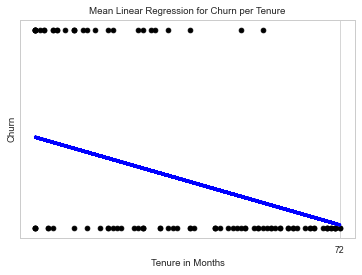

In [30]:
# Binary linear regression
show_single_variable_linear_regression(df['tenure'], df['Churn'])

In [31]:
# Code for model training
def show_single_variable_linear_regression(X, y):
    #Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)
    # Use only one feature
    X_small = X.array.reshape(-1,1)
    # Split the data into training/testing sets
    X_train = X_small[:-TEST_SIZE]
    X_test = X_small[-TEST_SIZE:]
    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    # Plot outputs
    plt.scatter(X_test[:100], y_test[:100], color="black")
    plt.plot(X_test[:100], y_pred[:100], color="blue", linewidth=3)
    plt.xticks([72])
    plt.yticks(())
    plt.title('Mean Linear Regression for Churn per Tenure')
    plt.xlabel('Tenure in Months')
    plt.ylabel('Churn')
    plt.show()

In [32]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn', 'Churn'],
      dtype='object')

In [33]:
tenure_array = df['tenure'].array
tenure_array

<PandasArray>
[ 1, 34,  2, 45,  2,  8, 22, 10, 28, 62,
 ...
 38, 67, 19, 12, 72, 24, 72, 11,  4, 66]
Length: 7043, dtype: int64

Coefficients: 
 [-0.00513831]
Mean squared error: 0.00
Coefficient of determination: 0.05


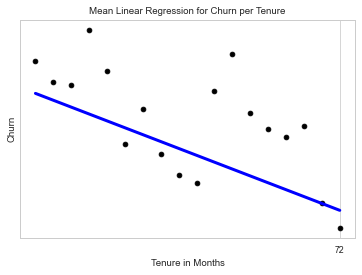

In [34]:
# Mean linear regression
show_single_variable_linear_regression(df_plot['tenure'], df_plot['Churn'])

In [35]:
# Code for model training
y = df['Churn']
X = df['tenure']
# Get number of examples
N_EXAMPLES = len(y)
TEST_SIZE = round(0.25 * N_EXAMPLES)
# Use only one feature
X_small = X.array.reshape(-1,1)
# Split the data into training/testing sets
X_train = X_small[:-TEST_SIZE]
X_test = X_small[-TEST_SIZE:]
# Split the targets into training/testing sets
y_train = y[:-TEST_SIZE]
y_test = y[-TEST_SIZE:]

In [36]:
# Fit classifier to training data
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [37]:
# Use classifier to predict test labels
y_pred = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
# Compare predicted labels to true labels
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7575241340147644


[Text(0.3817030325443787, 0.9642857142857143, 'X[0] <= 16.5\ngini = 0.386\nsamples = 5282\nvalue = [3900, 1382]'),
 Text(0.11834319526627218, 0.8928571428571429, 'X[0] <= 5.5\ngini = 0.494\nsamples = 1922\nvalue = [1067, 855]'),
 Text(0.03550295857988166, 0.8214285714285714, 'X[0] <= 0.5\ngini = 0.498\nsamples = 1027\nvalue = [483, 544]'),
 Text(0.023668639053254437, 0.75, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.047337278106508875, 0.75, 'X[0] <= 2.5\ngini = 0.498\nsamples = 1018\nvalue = [474, 544]'),
 Text(0.023668639053254437, 0.6785714285714286, 'X[0] <= 1.5\ngini = 0.489\nsamples = 639\nvalue = [272, 367]'),
 Text(0.011834319526627219, 0.6071428571428571, 'gini = 0.483\nsamples = 451\nvalue = [184, 267]'),
 Text(0.03550295857988166, 0.6071428571428571, 'gini = 0.498\nsamples = 188\nvalue = [88, 100]'),
 Text(0.07100591715976332, 0.6785714285714286, 'X[0] <= 3.5\ngini = 0.498\nsamples = 379\nvalue = [202, 177]'),
 Text(0.05917159763313609, 0.6071428571428571, 'gini = 0.

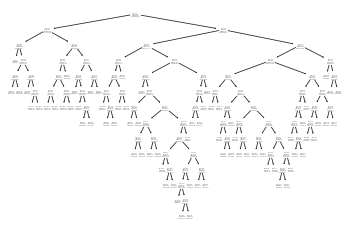

In [21]:
tree.plot_tree(clf)